In [ ]:
#this script is a final version of scaling analysis for revision on the PLOSONE journal

In [2]:
## load libraires

library(plyr)  
library(ggplot2)
library(reshape2)
library(xtable)
require(cowplot)


### baseLOAD

In [9]:
base <- read.csv(file="./data/br_cities_jm.csv", head=TRUE, sep=",")
str(base)

'data.frame':	5564 obs. of  67 variables:
 $ Codigo                                                 : int  110001 110002 110003 110004 110005 110006 110007 110008 110009 110010 ...
 $ Sigla                                                  : Factor w/ 27 levels "AC","AL","AM",..: 21 21 21 21 21 21 21 21 21 21 ...
 $ Municipio                                              : Factor w/ 5276 levels "A�ail�ndia","Abadia de Goi�s",..: 100 331 747 777 1112 1207 1310 1315 1582 1866 ...
 $ pop                                                    : int  24392 90353 6313 78574 17029 18591 8783 13678 28729 41656 ...
 $ area                                                   : num  7067 4427 1314 3793 2783 ...
 $ pib                                                    : num  149764 577130 44352 521358 121555 ...
 $ km_ruas                                                : num  0.627 5.019 0.741 3.413 1.596 ...
 $ densidade                                              : num  3.45 20.41 4.8 20.72 6.12 ...
 

In [10]:
#######################
##### Translation #####
#######################

original<-c('Codigo',
'Sigla',
'Municipio',
'pop',
'area',
'pib',
'km_ruas',
'densidade',
'estabelecimentos_saude_total',
'leitosinternacao_saude_total',
'escolas_fundamental',
'escolas_medio',
'escolas_preescola',
'ongs',
'emp_atuantes',
'emp_unidades_locais',
'vítimas_acidentes_trânsito',
'homicidios',
'suicidios',
'Despesa_corrente',
'Despesa_de_custeio',
'Despesa_de_capital',
'Despesa_orcamentaria',
'Despesas_por_funcao',
'Despesa_transferências_correntes',
'Receita_orcamentaria',
'Receita_corrente',
'Receita_tributaria',
'Receita_de_capital',
'Receita_tributaria_impostos',
'Receita_tributaria_IPTU',
'Receita_tributaria_ISS',
'Receita_tributaria_taxas',
'pessoas_comregistro',
'alfabetizados',
'renda',
'domicilio_tinha_banheiro',
'domicilio_tinha_banheiro_redeesgoto',
'pessoa_abastecimento_redegeral',
'pessoa_lixo_coletado',
'pessoa_energia_eletrica',
'pessoa_com_banheiroexclusivo',
'pessoa_energia_eletrica_medidor',
'pessoa_lixo_jogado_terrenobaldio',
'pessoa_lixo_queimado',
'receitaOperacional_total_aguaesgoto_reaisporano',
'arrecadacao_total_aguaesgoto_reaisporano',
'despesa_comPessoal_total_aguaesgoto_reaisporano',
'pop_abastecimentoAgua',
'ligacoes_totais_abastecimentoAgua',
'extencaoRede_abastecimentoAgua_km',
'consumoEnergia_abastecimentoAgua_milKWhporano',
'investimentos_abastecimentoAgua_reaisporano',
'paralizacoes_economiasAtivasAtingidas_abastecimentoAgua',
'pop_esgotamentoSanitario',
'ligacoes_totais_esgotamentoSanitario',
'economiasAtivas_esgotamentoSanitario',
'extencaoRede_esgotamentoSanitario_km',
'volumeColetado_esgotamentoSanitario_millm3porano',
'amostras_coliformesTotais_esgotamentoSanitario',
'pop_urb_atendida',
'catadoresAssociados_quantidade',
'residuosColetadoa_total_tonporano',
'caminhoes',
'despesaColeta_rsu_total_reaisporano',
'trabalhadores_rsu_total',
'sarjetasVarridas_total_kmporano')


translation<-c('idOfMunicipality',
'abbreviationOfState',
'nameOfMunicipality',
'numberOfInhabitants',
'surfaceOfAdministrativeArea_km2',
'GrossDomesticProduct_brReaisPerYear',
'LenghtOfStreetNetwork_thousandKm',
'populationDensity_inhabitantsPerkm2',
'numberOfHealthFacilities',
'numberOfHospitalBeds',
'numberOfPrimarySchools',
'numberOfSecondarySchools',
'numberOfDaycareFacilities',
'numberOfNonGovernmentalOrganizations',
'numberOfCommercialEnterprises',
'numberOfCommercialEnterprisesFacility',
'numberOfDeathsByTrafficAccident',
'numberOfHomicides',
'numberOfSuicides',
'currentExpenditure',
'subsidyExpenditure',
'capitalExpenditure',
'budgetedExpenditure',
'expenditureByFunction',
'currentExpenditureOfTransference',
'budgetedRevenue',
'currentRevenue',
'taxRevenue',
'capitalRevenue',
'taxRevenueTaxes',
'taxRevenueUrbanLandTax',
'taxRevenueServiceTax',
'taxRevenueTax',
'numberOfRegisteredInhabitants',
'numberOfLiterateInhabitants',
'AverageMonthlyIncomeOfActiveInhabitants_brReais',
'numberOfHousesWithBathroom',
'numberOfHousesConnectedToSewageSystem',
'numberOfInhabitantsWithMunicipalWaterSupply',
'numberOfInhabitantsServedByWasteCollection',
'numberOfInhabitantsWithAccessToElectricity',
'numberOfInhabitantsWithExclusiveBathroom',
'numberOfInhabitantsWithElectricityMeasurement',
'numberOfInhabitantsWithWasteIllegalDumping',
'numberOfInhabitantsWithWasteIllegalBurning',
'operationalExpenditureWaterAndWasteSystems_brReaisPerYear',
'revenueWaterAndWasteSystems_brReaisPerYear',
'staffExpenditureWaterAndWasteSystems_brReaisPerYear',
'numberOfInhabitantsWithMunicipalWaterSupply',
'numberOfConnectionsToWaterSupplyNetwork',
'lenghtOfWaterSupplyNetwork_km',
'finalEnergyUseByWaterSupplyAssets_kKwhPerYear', 
'investmentsOnWaterSupplyAssets_brReaisPerYear',
'numberOfInterruptionsInWaterSupply',
'numberOfInhabitantsConnectedToSewageNetwork',
'numberOfConnectionsToSewageNetwork',
'numberOfUserContractsOfSewageNetwork',
'lenghtOfSewageSupplyNetwork_km',
'volumeOfColectedSewage_km3PerYear',
'frequencyOfSamplingOfSewageEffluent',
'numberOfUrbanInhabitantsServedByWasteCollection',
'numberOfScavengersInWasteCollection',
'totalMassOfWasteCollected_tonsPerYear',
'numberOfWasteCollectionTrucks',
'wasteCollectionRevenue_brReaisPeryear',
'numberOfWorkersInWasteCollection',
'lengthOfSidewalkSwept_kmPerYear')

names <- data.frame(original, translation)
names
colnames(base) <- names$translation
colnames(base)

original,translation
Codigo,idOfMunicipality
Sigla,abbreviationOfState
Municipio,nameOfMunicipality
pop,numberOfInhabitants
area,surfaceOfAdministrativeArea_km2
pib,GrossDomesticProduct_brReaisPerYear
km_ruas,LenghtOfStreetNetwork_thousandKm
densidade,populationDensity_inhabitantsPerkm2
estabelecimentos_saude_total,numberOfHealthFacilities
leitosinternacao_saude_total,numberOfHospitalBeds


[1] "idOfMunicipality"                                         
 [2] "abbreviationOfState"                                      
 [3] "nameOfMunicipality"                                       
 [4] "numberOfInhabitants"                                      
 [5] "surfaceOfAdministrativeArea_km2"                          
 [6] "GrossDomesticProduct_brReaisPerYear"                      
 [7] "LenghtOfStreetNetwork_thousandKm"                         
 [8] "populationDensity_inhabitantsPerkm2"                      
 [9] "numberOfHealthFacilities"                                 
[10] "numberOfHospitalBeds"                                     
[11] "numberOfPrimarySchools"                                   
[12] "numberOfSecondarySchools"                                 
[13] "numberOfDaycareFacilities"                                
[14] "numberOfNonGovernmentalOrganizations"                     
[15] "numberOfCommercialEnterprises"                            
[16] "numberOfCommercialEnterprisesFacility"                    
[17] "numberOfDeathsByTrafficAccident"                          
[18] "numberOfHomicides"                                        
[19] "numberOfSuicides"                                         
[20] "currentExpenditure"                                       
[21] "subsidyExpenditure"                                       
[22] "capitalExpenditure"                                       
[23] "budgetedExpenditure"                                      
[24] "expenditureByFunction"                                    
[25] "currentExpenditureOfTransference"                         
[26] "budgetedRevenue"                                          
[27] "currentRevenue"                                           
[28] "taxRevenue"                                               
[29] "capitalRevenue"                                           
[30] "taxRevenueTaxes"                                          
[31] "taxRevenueUrbanLandTax"                                   
[32] "taxRevenueServiceTax"                                     
[33] "taxRevenueTax"                                            
[34] "numberOfRegisteredInhabitants"                            
[35] "numberOfLiterateInhabitants"                              
[36] "AverageMonthlyIncomeOfActiveInhabitants_brReais"          
[37] "numberOfHousesWithBathroom"                               
[38] "numberOfHousesConnectedToSewageSystem"                    
[39] "numberOfInhabitantsWithMunicipalWaterSupply"              
[40] "numberOfInhabitantsServedByWasteCollection"               
[41] "numberOfInhabitantsWithAccessToElectricity"               
[42] "numberOfInhabitantsWithExclusiveBathroom"                 
[43] "numberOfInhabitantsWithElectricityMeasurement"            
[44] "numberOfInhabitantsWithWasteIllegalDumping"               
[45] "numberOfInhabitantsWithWasteIllegalBurning"               
[46] "operationalExpenditureWaterAndWasteSystems_brReaisPerYear"
[47] "revenueWaterAndWasteSystems_brReaisPerYear"               
[48] "staffExpenditureWaterAndWasteSystems_brReaisPerYear"      
[49] "numberOfInhabitantsWithMunicipalWaterSupply"              
[50] "numberOfConnectionsToWaterSupplyNetwork"                  
[51] "lenghtOfWaterSupplyNetwork_km"                            
[52] "finalEnergyUseByWaterSupplyAssets_kKwhPerYear"            
[53] "investmentsOnWaterSupplyAssets_brReaisPerYear"            
[54] "numberOfInterruptionsInWaterSupply"                       
[55] "numberOfInhabitantsConnectedToSewageNetwork"              
[56] "numberOfConnectionsToSewageNetwork"                       
[57] "numberOfUserContractsOfSewageNetwork"                     
[58] "lenghtOfSewageSupplyNetwork_km"                           
[59] "volumeOfColectedSewage_km3PerYear"                        
[60] "frequencyOfSamplingOfSewageEffluent"                      
[61] "numberOfUrbanInhabitantsServedByWasteCollection"          
[62] "numberOfScavengersInWasteColle

In [11]:
base_cut <- base[base$populationDensity_inhabitantsPerkm2>1100,]

In [8]:
# READ CSV
scaling_rob <- read.csv(file="./data/brScaling_robustness.csv", header=TRUE, sep=",")

In [19]:
scaling_rob_class <- scaling_rob
scaling_rob_class$classification <- NA
scaling_rob_class$classification.bettencourt <- NA

In [20]:
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitants",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="surfaceOfAdministrativeArea_km2",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="GrossDomesticProduct_brReaisPerYear",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="LenghtOfStreetNetwork_thousandKm",]$classification.bettencourt  <- "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="populationDensity_inhabitantsPerkm2",]$classification.bettencourt  <- NA 
scaling_rob_class[scaling_rob_class$variable=="numberOfHealthFacilities",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfHospitalBeds",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfPrimarySchools",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfSecondarySchools",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfDaycareFacilities",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfNonGovernmentalOrganizations",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprises",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprisesFacility",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfDeathsByTrafficAccident",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfHomicides",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfSuicides",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="currentExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="subsidyExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="capitalExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="budgetedExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="expenditureByFunction",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="currentExpenditureOfTransference",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="budgetedRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="currentRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="capitalRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTaxes",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueUrbanLandTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueServiceTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfRegisteredInhabitants",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfLiterateInhabitants",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="AverageMonthlyIncomeOfActiveInhabitants_brReais",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesWithBathroom",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesConnectedToSewageSystem",]$classification.bettencourt  <-  "individual human needs"
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$classification.bettencourt  <-  "individual human needs"
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsServedByWasteCollection",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithAccessToElectricity",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithExclusiveBathroom",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithElectricityMeasurement",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalDumping",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalBurning",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="operationalExpenditureWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="revenueWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="staffExpenditureWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToWaterSupplyNetwork",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="lenghtOfWaterSupplyNetwork_km",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="finalEnergyUseByWaterSupplyAssets_kKwhPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="investmentsOnWaterSupplyAssets_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInterruptionsInWaterSupply",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsConnectedToSewageNetwork",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToSewageNetwork",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfUserContractsOfSewageNetwork",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="lenghtOfSewageSupplyNetwork_km",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="volumeOfColectedSewage_km3PerYear",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="frequencyOfSamplingOfSewageEffluent",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfUrbanInhabitantsServedByWasteCollection",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfScavengersInWasteCollection",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="totalMassOfWasteCollected_tonsPerYear",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfWasteCollectionTrucks",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="wasteCollectionRevenue_brReaisPeryear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfWorkersInWasteCollection",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="lengthOfSidewalkSwept_kmPerYear",]$classification.bettencourt  <-  "socioeconomic outputs"


In [21]:
scaling_rob_class$variable.selection <- 1

In [45]:
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitants",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="surfaceOfAdministrativeArea_km2",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="GrossDomesticProduct_brReaisPerYear",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="LenghtOfStreetNetwork_thousandKm",]$variable.selection  <- 1
scaling_rob_class[scaling_rob_class$variable=="populationDensity_inhabitantsPerkm2",]$variable.selection  <- NA 
scaling_rob_class[scaling_rob_class$variable=="numberOfHealthFacilities",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfHospitalBeds",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfPrimarySchools",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfSecondarySchools",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfDaycareFacilities",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfNonGovernmentalOrganizations",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprises",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprisesFacility",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfDeathsByTrafficAccident",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfHomicides",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfSuicides",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="currentExpenditure",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="subsidyExpenditure",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="capitalExpenditure",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="budgetedExpenditure",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="expenditureByFunction",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="currentExpenditureOfTransference",]$variable.selection  <-  NA
scaling_rob_class[scaling_rob_class$variable=="budgetedRevenue",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="currentRevenue",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="taxRevenue",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="capitalRevenue",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTaxes",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="taxRevenueUrbanLandTax",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="taxRevenueServiceTax",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTax",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfRegisteredInhabitants",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfLiterateInhabitants",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="AverageMonthlyIncomeOfActiveInhabitants_brReais",]$variable.selection  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesWithBathroom",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesConnectedToSewageSystem",]$variable.selection  <-  1
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$variable.selection  <-  0
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsServedByWasteCollection",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithAccessToElectricity",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithExclusiveBathroom",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithElectricityMeasurement",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalDumping",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalBurning",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="operationalExpenditureWaterAndWasteSystems_brReaisPerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="revenueWaterAndWasteSystems_brReaisPerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="staffExpenditureWaterAndWasteSystems_brReaisPerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToWaterSupplyNetwork",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="lenghtOfWaterSupplyNetwork_km",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="finalEnergyUseByWaterSupplyAssets_kKwhPerYear",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="investmentsOnWaterSupplyAssets_brReaisPerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfInterruptionsInWaterSupply",]$variable.selection  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsConnectedToSewageNetwork",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToSewageNetwork",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfUserContractsOfSewageNetwork",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="lenghtOfSewageSupplyNetwork_km",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="volumeOfColectedSewage_km3PerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="frequencyOfSamplingOfSewageEffluent",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfUrbanInhabitantsServedByWasteCollection",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="numberOfScavengersInWasteCollection",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="totalMassOfWasteCollected_tonsPerYear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfWasteCollectionTrucks",]$variable.selection  <-  1
scaling_rob_class[scaling_rob_class$variable=="wasteCollectionRevenue_brReaisPeryear",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="numberOfWorkersInWasteCollection",]$variable.selection  <-  0
scaling_rob_class[scaling_rob_class$variable=="lengthOfSidewalkSwept_kmPerYear",]$variable.selection  <- 0




In [47]:
data <- scaling_rob_class[scaling_rob_class$variable.selection==1,]


## PLOTS

### FIG 2

ERROR: Error in grid.newpage(): could not open file './plots/variables_rob_class_subset.jpg'


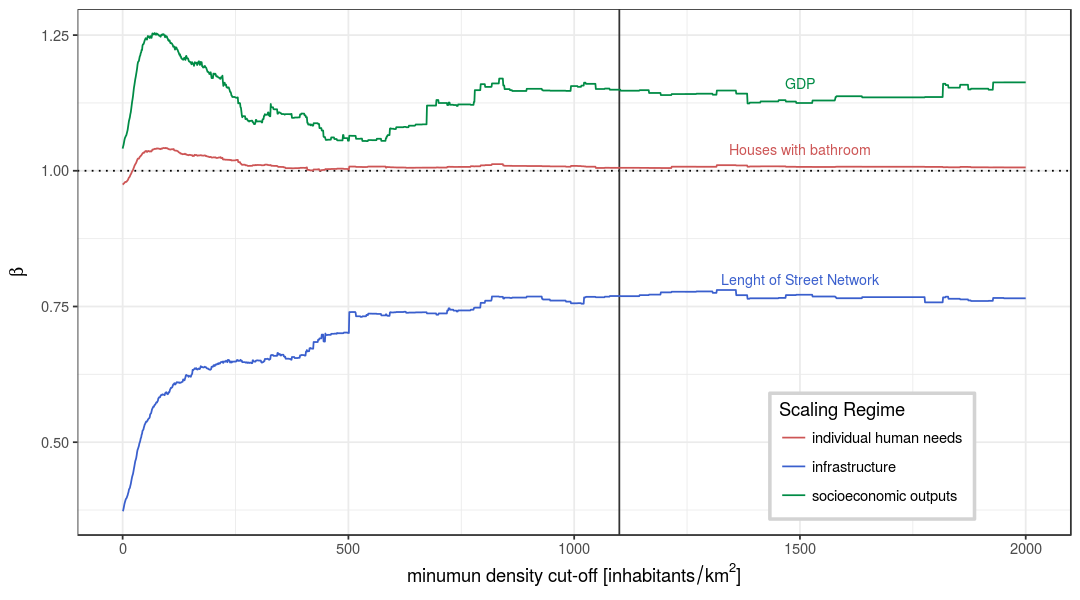

In [39]:
options(repr.plot.width=9, repr.plot.height=5)
selected.variables <- c("GrossDomesticProduct_brReaisPerYear", "LenghtOfStreetNetwork_thousandKm", "numberOfHousesWithBathroom")
data.subset <- data[data$variable %in% selected.variables, ]


#plot todas as variaveis
ggplot(data.subset, aes(dens_min, alpha, group=variable, colour=classification.bettencourt, label = variable))+

#annotate("text", label = "Hospital beds", x = 1500, y = 1.55, size = 3, colour = "royalblue3") +
annotate("text", label = "Houses with bathroom", x = 1500, y = 1.04, size = 3, colour = "indianred3") +
#annotate("text", label = "Inhabitants connected to sewage network", x = 1600, y = 1.25, size = 3, colour = "indianred3") +
annotate("text", label = "GDP", x = 1500, y = 1.16, size = 3, colour = "springgreen4") +
annotate("text", label = "Lenght of Street Network", x = 1500, y = 0.8, size = 3, colour = "royalblue3") +
#geom_rect(data=NULL,aes(xmin=-Inf,xmax=Inf,ymin=-Inf,ymax=0.95), fill="palegreen", alpha=0.9, color=NA)+
#geom_rect(data=NULL,aes(xmin=-Inf,xmax=Inf,ymin=0.95,ymax=1.05), fill="indianred1", alpha=0.9, color=NA)+
#geom_rect(data=NULL,aes(xmin=-Inf,xmax=Inf,ymin=1.05,ymax=Inf), fill="paleturquoise", alpha=0.9, color=NA)+
geom_hline(yintercept=1, color="black", linetype="dotted") +
ylab(expression(beta))+xlab(expression(paste("minumun density cut-off ", '[', inhabitants/km^2,']')))+
geom_vline(xintercept=1100, color="grey20")+
scale_color_manual(values=c("indianred3", "royalblue3", "springgreen4"),name = "Scaling Regime")+
geom_line()+theme_bw()+ theme(legend.position=c(0.8, 0.15), legend.background = element_rect(color = "lightgray", size = 1, linetype = "solid"))

ggsave('./plots/variables_rob_class_subset.jpg', width=9, height= 5) 

### FIG 3

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

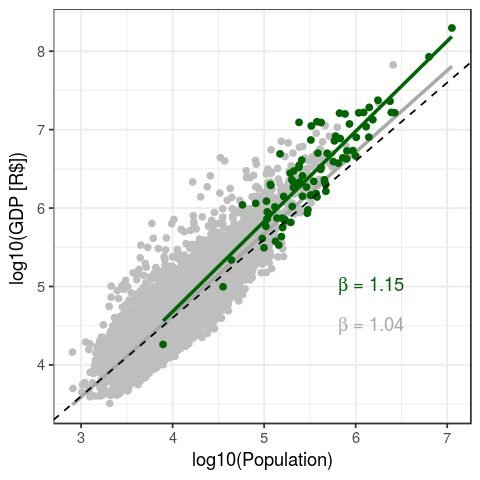

In [68]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(base, aes(log10(numberOfInhabitants), log10(GrossDomesticProduct_brReaisPerYear)))+
geom_point(colour = "gray")+geom_smooth(se = FALSE, method = "lm",colour = "darkgray")+
geom_point(data=base_cut, aes(log10(numberOfInhabitants), log10(GrossDomesticProduct_brReaisPerYear)), colour = "darkgreen")+
geom_smooth(data=base_cut, se = FALSE, method = "lm",colour = "darkgreen")+
geom_abline(intercept = 0.6, slope = 1,linetype="dashed")+
annotate("text", x = 6.2, y = 4.5, label = "paste(beta, \" = 1.04 \")", parse = TRUE, colour = "darkgray")+
annotate("text", x = 6.2, y = 5, label = "paste(beta, \" = 1.15 \")", parse = TRUE, colour = "darkgreen")+
xlab("log10(Population)")+ylab("log10(GDP [R$]) ")+theme_bw()


           
         
ggsave('./data/plots/plosONE/rev2/gdp.jpg', width=4, height= 4) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

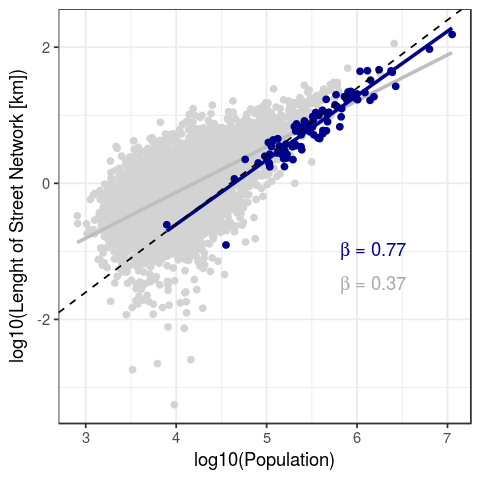

In [85]:
options(repr.plot.width=4, repr.plot.height=4)

t
ggplot(base[base$LenghtOfStreetNetwork_thousandKm>0,], aes(log10(numberOfInhabitants), log10(LenghtOfStreetNetwork_thousandKm)))+
geom_point(colour = "lightgray")+geom_smooth(se = FALSE, method = "lm",colour = "gray")+
geom_point(data=base_cut, aes(log10(numberOfInhabitants), log10(LenghtOfStreetNetwork_thousandKm)), colour = "darkblue")+
geom_smooth(data=base_cut, se = FALSE, method = "lm",colour = "darkblue")+
geom_abline(intercept = -4.6, slope = 1,linetype="dashed")+
annotate("text", x =6.2, y = -1.5, label = "paste(beta, \" = 0.37 \")", parse = TRUE, colour = "darkgray")+
annotate("text", x =6.2, y = -1, label = "paste(beta, \" = 0.77 \")", parse = TRUE, colour = "darkblue")+
xlab("log10(Population)")+ylab("log10(Lenght of Street Network [km])")+theme_bw()
           

ggsave('./data/plots/plosONE/rev2/streetnwrk.jpg', width=4, height= 4) 

### FIG 5

ERROR: Error in grid.newpage(): could not open file './plots/infra_rob.jpg'


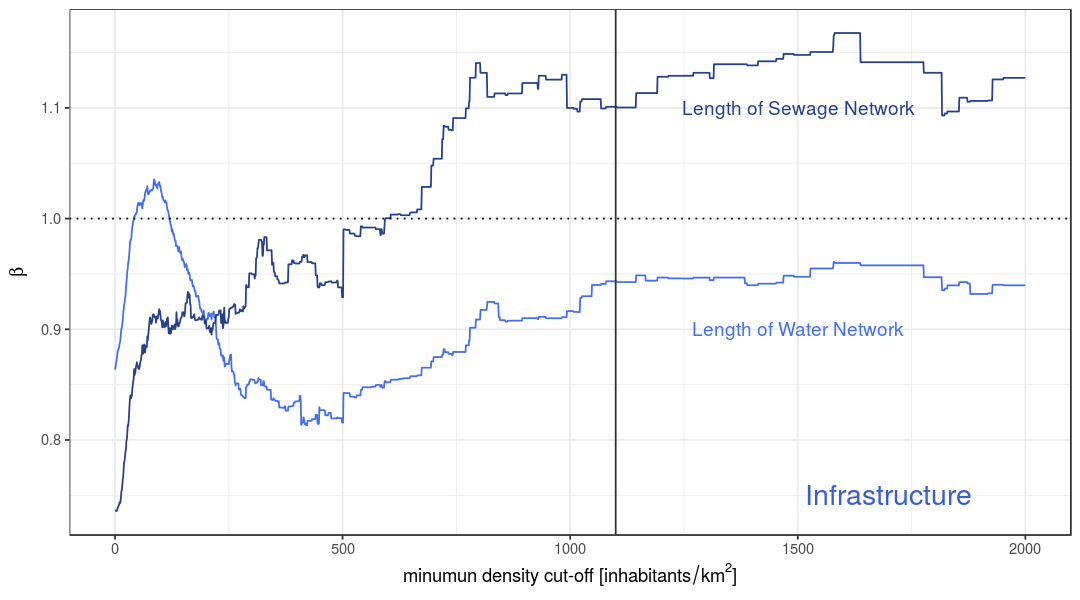

In [41]:
#scale_color_manual(values=c("indianred3", "royalblue3", "springgreen4"))
options(repr.plot.width=9, repr.plot.height=5)
infra <- 
ggplot()+
#geom_line(data=data[data$variable=="LenghtOfStreetNetwork_thousandKm",], aes(dens_min, alpha),colour="royalblue1")+
#annotate("text", x = 1550, y = 0.72, label = "Length of Street Network",colour="royalblue1", size=3)+

geom_line(data=data[data$variable=="lenghtOfWaterSupplyNetwork_km",], aes(dens_min, alpha),colour="royalblue2")+
annotate("text", x = 1500, y = 0.9, label = "Length of Water Network",colour="royalblue2", size=4)+

geom_line(data=data[data$variable=="lenghtOfSewageSupplyNetwork_km",], aes(dens_min, alpha),colour="royalblue4")+
annotate("text", x = 1500, y = 1.1, label = "Length of Sewage Network",colour="royalblue4", size=4)+

ylab(expression(beta))+xlab(expression(paste("minumun density cut-off ", '[', inhabitants/km^2,']')))+
geom_hline(yintercept=1, color="black", linetype="dotted") +
geom_vline(xintercept=1100, color="grey20")+theme_bw()+
annotate("text", x = 1700, y = 0.75, label = "Infrastructure",colour="royalblue3", size=6)



infra
ggsave('./plots/infra_rob.jpg', width=9, height= 5) 

Warning message:
“Removed 8004 rows containing missing values (geom_path).”Warning message:
“Removed 8004 rows containing missing values (geom_path).”

ERROR: Error in grid.newpage(): could not open file './plots/needs_rob.jpg'


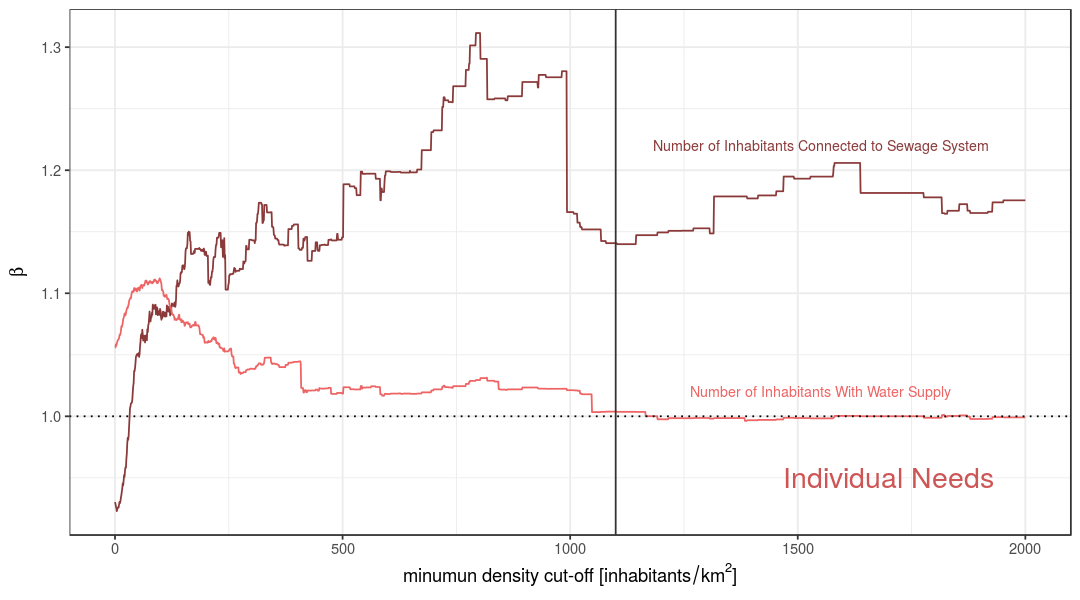

In [48]:
  
needs <- 
ggplot()+
#geom_line(data=data[data$variable=="numberOfInhabitantsWithExclusiveBathroom",], aes(dens_min, alpha),colour="indianred2")+
#annotate("text", x = 1550, y = 1.04, label = "Number of Inhabitants With Bathroom",colour="indianred2", size=3)+

geom_line(data=data[data$variable=="numberOfInhabitantsConnectedToSewageNetwork",], aes(dens_min, alpha),colour="indianred4")+
annotate("text", x = 1550, y = 1.22, label = "Number of Inhabitants Connected to Sewage System",colour="indianred4", size=3)+

geom_line(data=data[data$variable=="numberOfInhabitantsWithMunicipalWaterSupply",], aes(dens_min, alpha),colour="indianred2")+
annotate("text", x = 1550, y = 1.02, label = "Number of Inhabitants With Water Supply",colour="indianred2", size=3)+

ylab(expression(beta))+xlab(expression(paste("minumun density cut-off ", '[', inhabitants/km^2,']')))+
geom_hline(yintercept=1, color="black", linetype="dotted") +
geom_vline(xintercept=1100, color="grey20")+theme_bw()+
annotate("text", x = 1700, y = 0.95, label = "Individual Needs",colour="indianred3", size=6)

needs
ggsave('./plots/needs_rob.jpg', width=9, height= 5) 

Warning message:
“Removed 8004 rows containing missing values (geom_path).”Warning message:
“Removed 8004 rows containing missing values (geom_path).”

ERROR: Error in grid.newpage(): could not open file './plots/discussion_rob.jpg'


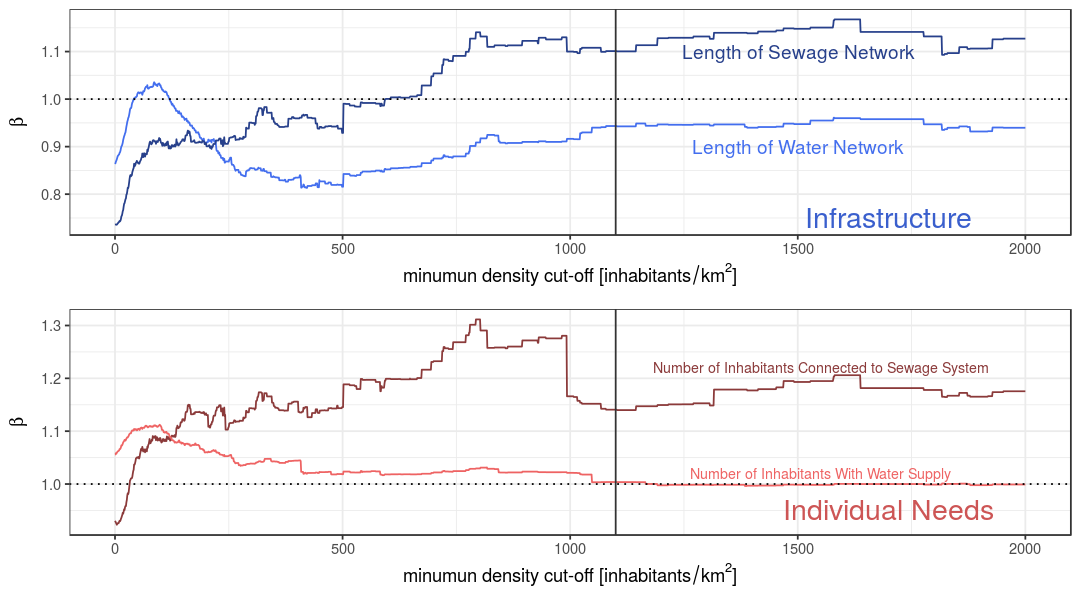

In [49]:
plot_grid(infra, needs, labels = c("",""), ncol = 1, align = 'v')
ggsave('./plots/discussion_rob.jpg', width=9, height= 6) 

### SUPPLEMENTARY MATERIAL

ERROR: Error in grid.newpage(): could not open file './plots/variables_rob_class.jpg'


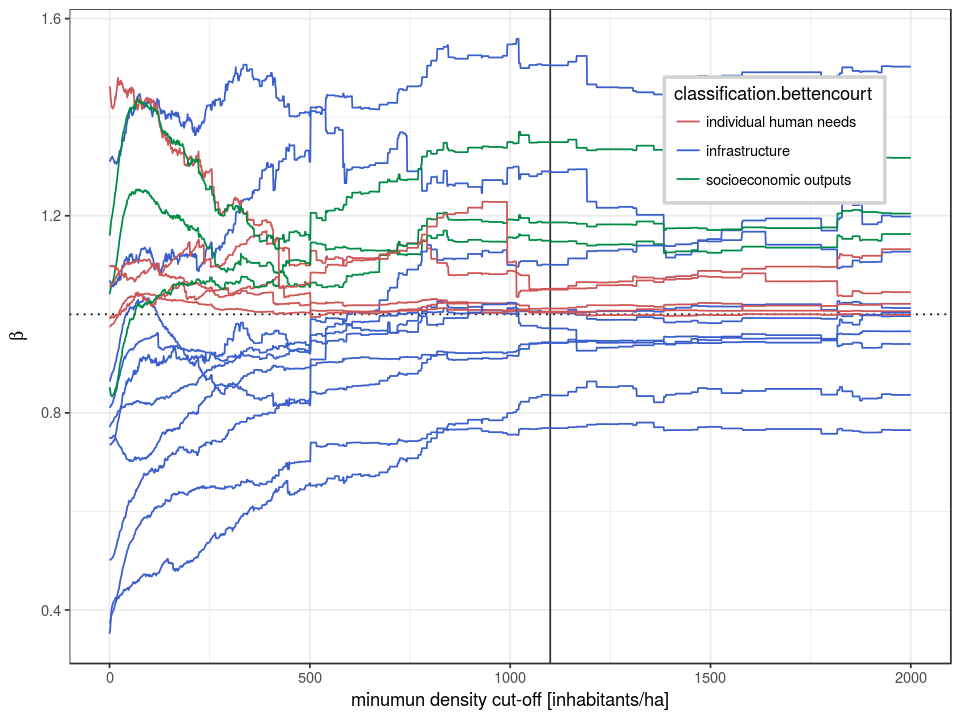

In [25]:
options(repr.plot.width=8, repr.plot.height=6)
data <- scaling_rob_class[!is.na(scaling_rob_class$classification.bettencourt)&scaling_rob_class$variable.selection==1,]

#ggplot(data, aes(dens_min, alpha.delta.movavg, group=variable, colour=classification.bettencourt))+
#geom_line()+
#ylab(expression(beta))+theme_bw()

#plot todas as variaveis
ggplot(data, aes(dens_min, alpha, group=variable, colour=classification.bettencourt))+
geom_hline(yintercept=1, color="black", linetype="dotted") +
ylab(expression(beta))+xlab("minumun density cut-off [inhabitants/ha]")+
geom_vline(xintercept=1100, color="grey20")+
scale_color_manual(values=c("indianred3", "royalblue3", "springgreen4"))+
geom_line()+theme_bw()+ theme(legend.position=c(0.8, 0.8), legend.background = element_rect(color = "lightgray", size = 1, linetype = "solid"))
ggsave('./plots/variables_rob_class.jpg', width=8, height= 4) 

#plot todas as variaveis smooth
#ggplot(data[data$dens_min>50&data$dens_min<1950,], aes(dens_min, alpha.movavg, group=variable, colour=classification.bettencourt))+
#geom_hline(yintercept=1, color="black", linetype="dotted") +
#ylab(expression(beta))+
#geom_vline(xintercept=1100, color="grey20")+
#scale_color_manual(values=c("indianred3", "royalblue3", "springgreen4"))+
#geom_line()+theme_bw()#+ theme(legend.position="none")

ggsave('./plots/variables_rob_class.jpg', width=9, height= 6) 




### MR aggregate

In [5]:
base_tmp <- base 


db_without_MR <- base_tmp

#db with MT
db_with_MR <- db_without_MR[length(temp), ]



for (i in 1:length(temp)) {
  
    rm <- assign(temp[i], read.csv(temp[i]))
    rm$Codigo <- as.numeric(substr(rm$Codigo, start = 1, stop = 6))

   
    #exclude municipalities within MR
    db_without_MR <- subset(db_without_MR, !(db_without_MR$idOfMunicipality %in% rm$Codigo))


    
    #select subset of base with municipalities within MR
    db_of_MR <- subset(base_tmp, (base_tmp$idOfMunicipality %in% rm$Codigo))


    rm_name <- paste("rm_", gsub('.{4}$', '', temp[i]), sep="")
    
    rm <- c(rm_name, 'rm', rm_name)
    rm[4:67] <- as.numeric(colSums(db_of_MR[,4:67], na.rm = TRUE)) #ignoring NAs
    rm[8] <- weighted.mean(db_of_MR$populationDensity_inhabitantsPerkm2,  db_of_MR$numberOfInhabitants)

    print(rm)
    db_with_MR <- rbind(db_with_MR, rm)

}



db_with_MR <- db_with_MR[-1,]

base_rm <- rbind(db_without_MR, db_with_MR)


ERROR: Error in `[.data.frame`(db_without_MR, length(temp), ): object 'temp' not found


In [214]:
#tranform  into numeric
cols = c(3:67)    
base_rm[,cols] = apply(base_rm[,cols], 2, function(x) as.numeric(as.character(x)));


### baseCUT

In [6]:
base_cut <- base[base$populationDensity_inhabitantsPerkm2>1100,]
base_cut$nameOfMunicipality

[1] Ananindeua              Bel�m                   S�o Lu�s               
 [4] Fortaleza               Maracana�               Parnamirim             
 [7] Natal                   Bayeux                  Cabedelo               
[10] Jo�o Pessoa             Camaragibe              Jaboat�o dos Guararapes
[13] Olinda                  Paulista                Recife                 
[16] Toritama                Macei�                  Aracaju                
[19] <NA>                    Lauro de Freitas        Salvador               
[22] Belo Horizonte          Betim                   Contagem               
[25] Ibirit�                 Ipatinga                Ribeir�o das Neves     
[28] Santa Cruz de Minas     Vespasiano              Cariacica              
[31] Vila Velha              Vit�ria                 Belford Roxo           
[34] Duque de Caxias         Japeri                  Mesquita               
[37] Nil�polis               Niter�i                 Nova Igua�u            
[40] Queimados               Rio de Janeiro          S�o Gon�alo            
[43] S�o Jo�o de Meriti      Volta Redonda           Americana              
[46] Barueri                 Campinas                Carapicu�ba            
[49] Diadema                 Embu                    Ferraz de Vasconcelos  
[52] Francisco Morato        Guaruj�                 Guarulhos              
[55] Hortol�ndia             Itapevi                 Itaquaquecetuba        
[58] Jandira                 Mau�                    Osasco                 
[61] Po�                     Praia Grande            Ribeir�o Pires         
[64] Rio Grande da Serra     Santo Andr�             Santos                 
[67] S�o Bernardo do Campo   S�o Caetano do Sul      S�o Paulo              
[70] S�o Vicente             Sorocaba                Sumar�                 
[73] Suzano                  Tabo�o da Serra         V�rzea Paulista        
[76] Curitiba                Pinhais                 Balne�rio Cambori�     
[79] S�o Jos�                Alvorada                Cachoeirinha           
[82] Canoas                  Esteio                  Porto Alegre           
[85] S�o Leopoldo            Sapucaia do Sul         Aparecida de Goi�nia   
[88] Goi�nia                 Valpara�so de Goi�s    
5276 Levels: A�ail�ndia Abadia de Goi�s Abadia dos Dourados Abadi�nia ... Zort�a

In [251]:
base_rm_cut <- base_rm[base_rm$populationDensity_inhabitantsPerkm2>1100,]
base_rm_cut$idOfMunicipality

[1] "261540"             NA                   "315733"            
 [4] "330630"             "355220"             "355650"            
 [7] "rm_aracaju"         "rm_baixadasantista" "rm_belem"          
[10] "rm_belohorizonte"   "rm_campinas"        "rm_curitiba"       
[13] "rm_foratelza"       "rm_goiania"         "rm_joaopessoa"     
[16] "rm_maceio"          "rm_natal"           "rm_portoalegre"    
[19] "rm_recife"          "rm_riodejaneiro"    "rm_salcador"       
[22] "rm_saopaulo"        "rm_vitoria"

In [7]:
base_rm_cut

ERROR: Error in eval(expr, envir, enclos): object 'base_rm_cut' not found


# Robustness

In [217]:
#create data.frame without city names and state for the scaling analysis
basepar_sp <- base_rm[-c(1:3)]

In [8]:
#create data.frames and vectors to be used in the robustness analysis 
  dens_cuts <- c(0:2000)
print(length(dens_cuts))

  l <- length(dens_cuts)

  scaling_rob <- data.frame(matrix(ncol = 11, nrow = 0))
  colnames(scaling_rob) <- c("dens_min", "cases","variable", "intercept", "alpha", "rsquared", "pvalue", "std_error", "ci_lw", "ci_hi")

  scale_regression <- list()


[1] 2001


In [9]:
options(warn=-1)

In [220]:
#Run the robustness analysis
for (v in 1:ncol(basepar_sp)){
  print(v/ncol(basepar_sp))
  colnames(basepar_sp)[v]
  
  scale_v <- data.frame(matrix(ncol = 10, nrow = 0))
  colnames(scale_v) <- c("dens_min", "cases","variable", "intercept", "alpha", "rsquared", "pvalue", "std_error", "ci_lw", "ci_hi")
  
  for (i in dens_cuts)  {
   # print(i)
    

    # density_cut
    basepars_v <- subset(basepar_sp, populationDensity_inhabitantsPerkm2>i)
    #print(nrow(basepars_v))
    
    ### +1 to make log(0) = 0 ###
    scale_regression <- lm(log10(basepars_v[,v]+1) ~ log10(basepars_v[,1]+1))
    
    
    scale_v[[i+1, 1]]<- i
    scale_v[[i+1, 2]] <- nrow(basepars_v)
    scale_v[[i+1, 3]]<- colnames(basepars_v)[v]
    
    
    scale_v[[i+1, 4]] <- summary(scale_regression)$coefficients[1,1] #intercept
    scale_v[[i+1, 5]] <- summary(scale_regression)$coefficients[2,1] #alpha
    scale_v[[i+1, 6]] <- summary(scale_regression)$r.squared #rsquared
    scale_v[[i+1, 7]] <- summary(scale_regression)$coefficients[2,4] #pvalue 
    scale_v[[i+1, 8]] <- summary(scale_regression)$coefficients[2,2] #std_erros
    scale_v[[i+1, 9]] <- confint(scale_regression, level=0.9)[2,1] #90ci_lw
    scale_v[[i+1, 10]] <- confint(scale_regression, level=0.9)[2,2] #90ci_hi
      
    
    
  }
  scaling_rob <- rbind(scaling_rob,scale_v)
  
}   


[1] 0.015625
[1] 0.03125
[1] 0.046875
[1] 0.0625
[1] 0.078125
[1] 0.09375
[1] 0.109375
[1] 0.125
[1] 0.140625
[1] 0.15625
[1] 0.171875
[1] 0.1875
[1] 0.203125
[1] 0.21875
[1] 0.234375
[1] 0.25
[1] 0.265625
[1] 0.28125
[1] 0.296875
[1] 0.3125
[1] 0.328125
[1] 0.34375
[1] 0.359375
[1] 0.375
[1] 0.390625
[1] 0.40625
[1] 0.421875
[1] 0.4375
[1] 0.453125
[1] 0.46875
[1] 0.484375
[1] 0.5
[1] 0.515625
[1] 0.53125
[1] 0.546875
[1] 0.5625
[1] 0.578125
[1] 0.59375
[1] 0.609375
[1] 0.625
[1] 0.640625
[1] 0.65625
[1] 0.671875
[1] 0.6875
[1] 0.703125
[1] 0.71875
[1] 0.734375
[1] 0.75
[1] 0.765625
[1] 0.78125
[1] 0.796875
[1] 0.8125
[1] 0.828125
[1] 0.84375
[1] 0.859375
[1] 0.875
[1] 0.890625
[1] 0.90625
[1] 0.921875
[1] 0.9375
[1] 0.953125
[1] 0.96875
[1] 0.984375
[1] 1


In [222]:
#numberOfInhabitants
scaling_rob[scaling_rob$variable=="GrossDomesticProduct_brReaisPerYear"&scaling_rob$dens_min==0,]
scaling_rob[scaling_rob$variable=="LenghtOfStreetNetwork_thousandKm"&scaling_rob$dens_min==0,]
scaling_rob[scaling_rob$variable=="numberOfHousesWithBathroom"&scaling_rob$dens_min==0,]

scaling_rob[scaling_rob$variable=="GrossDomesticProduct_brReaisPerYear"&scaling_rob$dens_min==1100,]
scaling_rob[scaling_rob$variable=="LenghtOfStreetNetwork_thousandKm"&scaling_rob$dens_min==1100,]
scaling_rob[scaling_rob$variable=="surfaceOfAdministrativeArea_km2"&scaling_rob$dens_min==1100,]
#

#scaling_rob[variable=="surfaceOfAdministrativeArea_km2"&dens_min==0]

,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
4003,0,4909,GrossDomesticProduct_brReaisPerYear,0.5857161,1.008673,0.7280239,0,0.008801064,0.9941943,1.023153


,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
6004,0,4909,LenghtOfStreetNetwork_thousandKm,-1.280739,0.3940336,0.5140278,0,0.005469375,0.3850356,0.4030316


,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
66034,0,4909,numberOfHousesWithBathroom,-0.4415829,0.9600527,0.9054367,0,0.004429139,0.9527661,0.9673394


,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
5103,1100,22,GrossDomesticProduct_brReaisPerYear,-0.2706796,1.193888,0.965595,4.160266e-16,0.05039207,1.106976,1.2808


,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
7104,1100,22,LenghtOfStreetNetwork_thousandKm,-3.482859,0.8285403,0.9334355,3.104473e-13,0.0494741,0.7432114,0.9138692


,dens_min,cases,variable,intercept,alpha,rsquared,pvalue,std_error,ci_lw,ci_hi
3102,1100,22,surfaceOfAdministrativeArea_km2,-3.647108,1.119673,0.9008922,1.68885e-11,0.08304117,0.97645,1.262895


In [223]:
base_cut <- base[base$populationDensity_inhabitantsPerkm2>1100,]

## PLOTS

ERROR: Error in grid.newpage(): could not open file './plots/gdp.jpg'


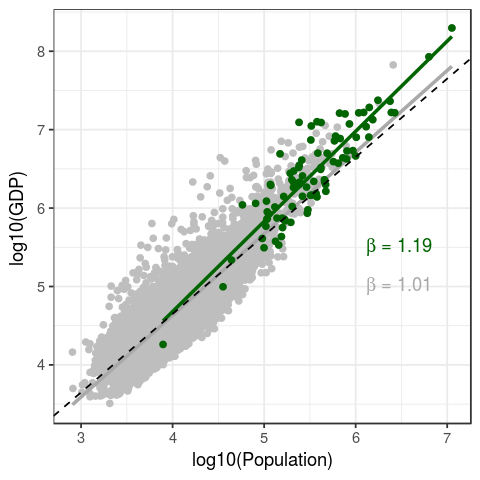

In [45]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(base, aes(log10(numberOfInhabitants), log10(GrossDomesticProduct_brReaisPerYear)))+
geom_point(colour = "gray")+geom_smooth(se = FALSE, method = "lm",colour = "darkgray")+
geom_point(data=base_cut, aes(log10(numberOfInhabitants), log10(GrossDomesticProduct_brReaisPerYear)), colour = "darkgreen")+
geom_smooth(data=base_cut, se = FALSE, method = "lm",colour = "darkgreen")+
geom_abline(intercept = 0.65, slope = 1,linetype="dashed")+
annotate("text", x = 6.5, y = 5, label = "paste(beta, \" = 1.01 \")", parse = TRUE, colour = "darkgray")+
annotate("text", x = 6.5, y = 5.5, label = "paste(beta, \" = 1.19 \")", parse = TRUE, colour = "darkgreen")+
xlab("log10(Population)")+ylab("log10(GDP) ")+theme_bw()#+ 
#scale_x_continuous(name="log10(Population)", labels=c('1k', '10k', '100k', '1M', '10M'))#+
#scale_x_continuous(name="log10(GDP)", labels=c('10k', '100k', '1M', '10M', '100M'))

           
         
ggsave('./plots/gdp.jpg', width=4, height= 4) 

ERROR: Error in grid.newpage(): could not open file './plots/streetnwrk.jpg'


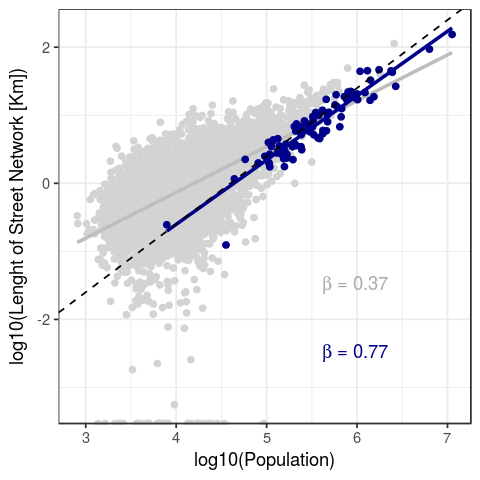

In [43]:
options(repr.plot.width=4, repr.plot.height=4)


ggplot(base, aes(log10(numberOfInhabitants), log10(LenghtOfStreetNetwork_thousandKm)))+
geom_point(colour = "lightgray")+geom_smooth(se = FALSE, method = "lm",colour = "gray")+
geom_point(data=base_cut, aes(log10(numberOfInhabitants), log10(LenghtOfStreetNetwork_thousandKm)), colour = "darkblue")+
geom_smooth(data=base_cut, se = FALSE, method = "lm",colour = "darkblue")+
geom_abline(intercept = -4.6, slope = 1,linetype="dashed")+
annotate("text", x = 6, y = -1.5, label = "paste(beta, \" = 0.37 \")", parse = TRUE, colour = "darkgray")+
annotate("text", x = 6, y = -2.5, label = "paste(beta, \" = 0.77 \")", parse = TRUE, colour = "darkblue")+
xlab("log10(Population)")+ylab("log10(Lenght of Street Network [Km])")+theme_bw()
           
ggsave('./plots/streetnwrk.jpg', width=4, height= 4)     

### Class

In [246]:
scaling_rob_class <- scaling_rob
scaling_rob_class$classification <- NA
scaling_rob_class$classification.bettencourt <- NA

In [247]:
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitants",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="surfaceOfAdministrativeArea_km2",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="GrossDomesticProduct_brReaisPerYear",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="LenghtOfStreetNetwork_thousandKm",]$classification.bettencourt  <- "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="populationDensity_inhabitantsPerkm2",]$classification.bettencourt  <- NA 
scaling_rob_class[scaling_rob_class$variable=="numberOfHealthFacilities",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfHospitalBeds",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfPrimarySchools",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfSecondarySchools",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfDaycareFacilities",]$classification.bettencourt  <-  "infrastructure" 
scaling_rob_class[scaling_rob_class$variable=="numberOfNonGovernmentalOrganizations",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprises",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfCommercialEnterprisesFacility",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfDeathsByTrafficAccident",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfHomicides",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfSuicides",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="currentExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="subsidyExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="capitalExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="budgetedExpenditure",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="expenditureByFunction",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="currentExpenditureOfTransference",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="budgetedRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="currentRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="capitalRevenue",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTaxes",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueUrbanLandTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueServiceTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="taxRevenueTax",]$classification.bettencourt  <-  "socioeconomic outputs"
scaling_rob_class[scaling_rob_class$variable=="numberOfRegisteredInhabitants",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfLiterateInhabitants",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="AverageMonthlyIncomeOfActiveInhabitants_brReais",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesWithBathroom",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfHousesConnectedToSewageSystem",]$classification.bettencourt  <-  "individual human needs"
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$classification.bettencourt  <-  "individual human needs"
#scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsServedByWasteCollection",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithAccessToElectricity",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithExclusiveBathroom",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithElectricityMeasurement",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalDumping",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithWasteIllegalBurning",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="operationalExpenditureWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="revenueWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="staffExpenditureWaterAndWasteSystems_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsWithMunicipalWaterSupply",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToWaterSupplyNetwork",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="lenghtOfWaterSupplyNetwork_km",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="finalEnergyUseByWaterSupplyAssets_kKwhPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="investmentsOnWaterSupplyAssets_brReaisPerYear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfInterruptionsInWaterSupply",]$classification.bettencourt  <-  NA
scaling_rob_class[scaling_rob_class$variable=="numberOfInhabitantsConnectedToSewageNetwork",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfConnectionsToSewageNetwork",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfUserContractsOfSewageNetwork",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="lenghtOfSewageSupplyNetwork_km",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="volumeOfColectedSewage_km3PerYear",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="frequencyOfSamplingOfSewageEffluent",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfUrbanInhabitantsServedByWasteCollection",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfScavengersInWasteCollection",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="totalMassOfWasteCollected_tonsPerYear",]$classification.bettencourt  <-  "individual human needs"
scaling_rob_class[scaling_rob_class$variable=="numberOfWasteCollectionTrucks",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="wasteCollectionRevenue_brReaisPeryear",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="numberOfWorkersInWasteCollection",]$classification.bettencourt  <-  "infrastructure"
scaling_rob_class[scaling_rob_class$variable=="lengthOfSidewalkSwept_kmPerYear",]$classification.bettencourt  <-  "socioeconomic outputs"


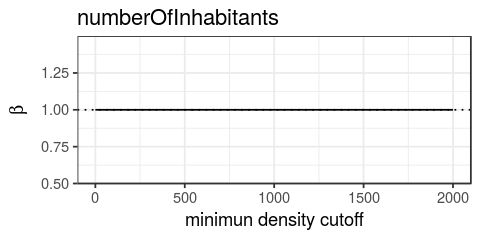

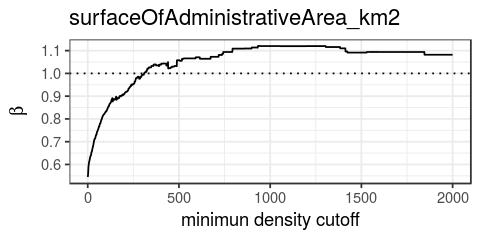

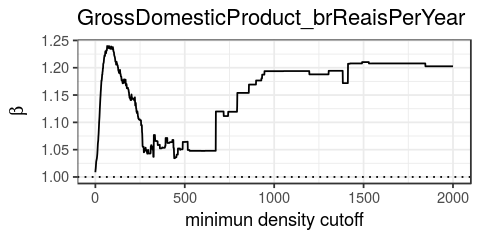

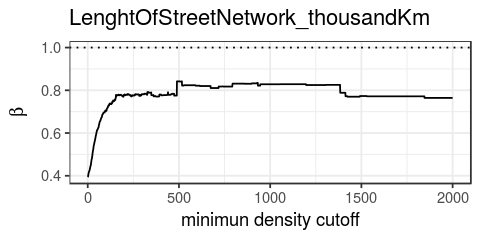

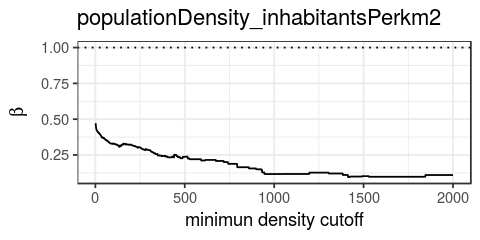

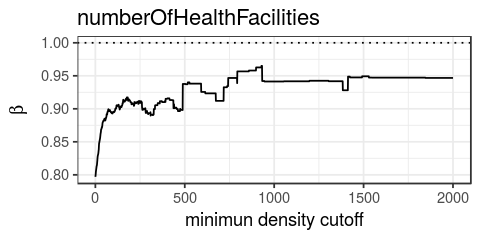

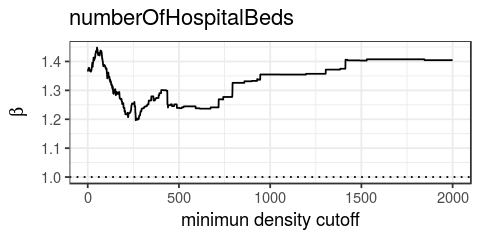

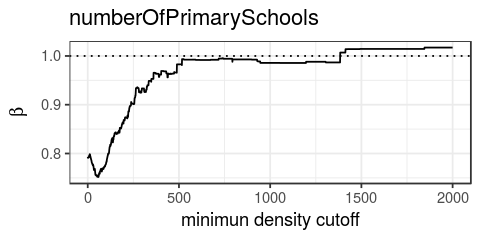

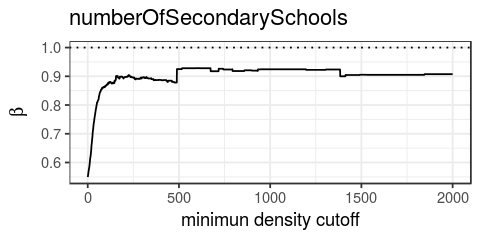

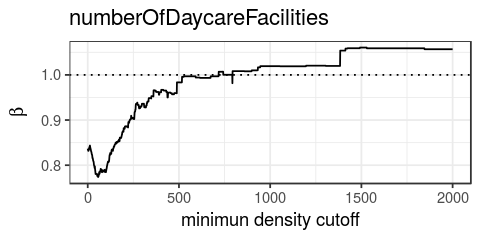

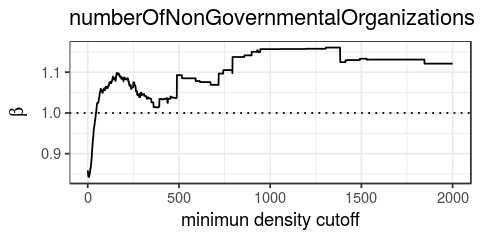

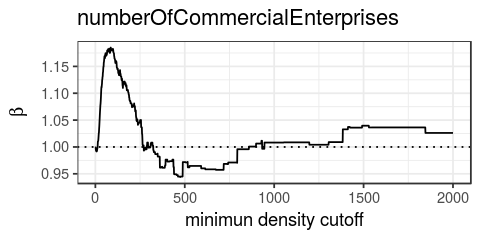

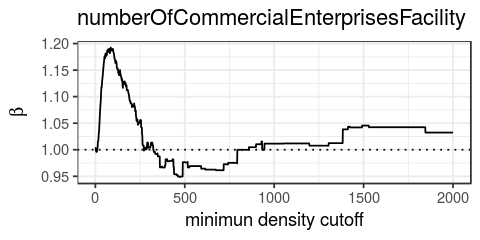

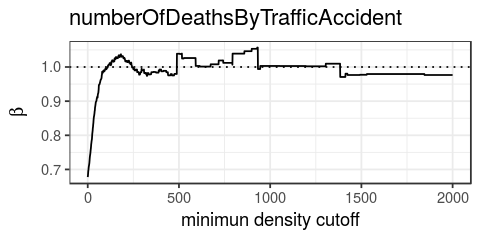

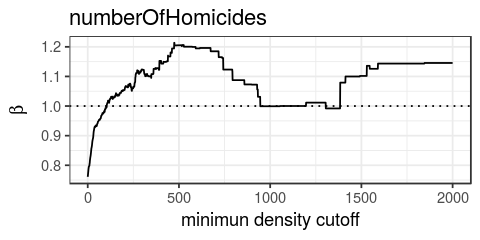

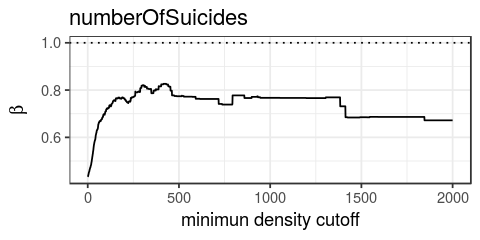

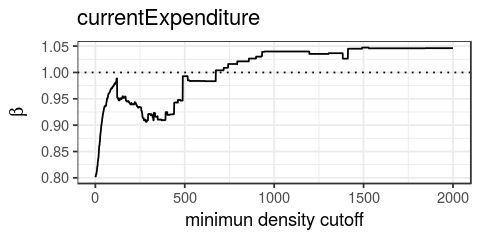

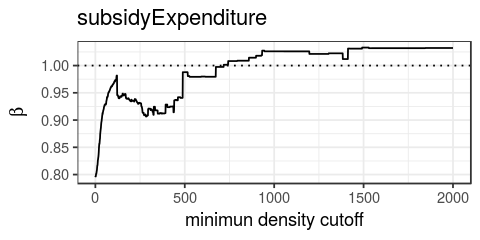

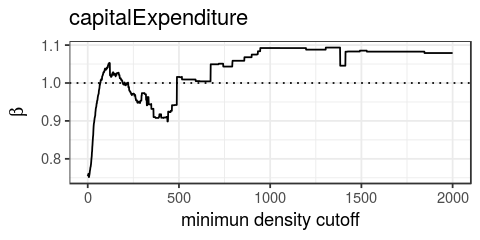

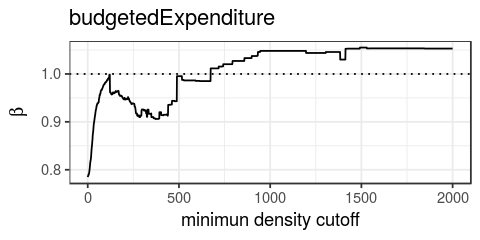

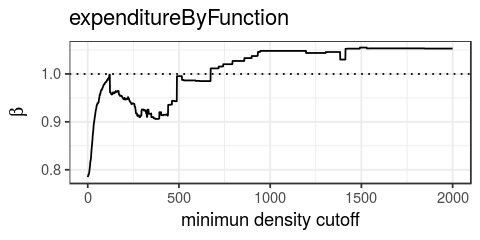

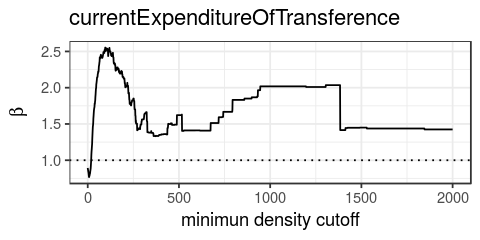

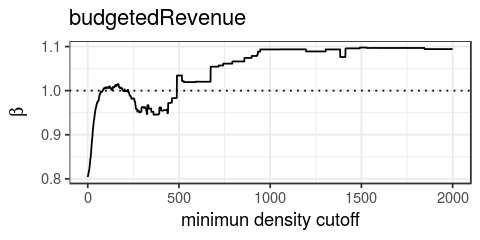

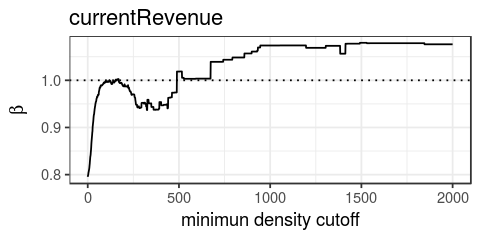

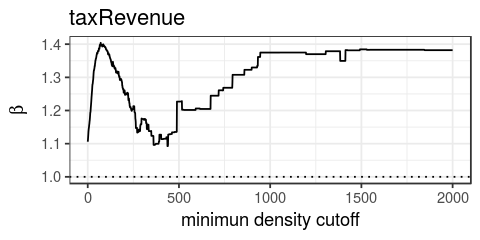

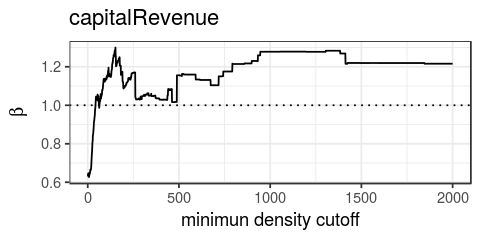

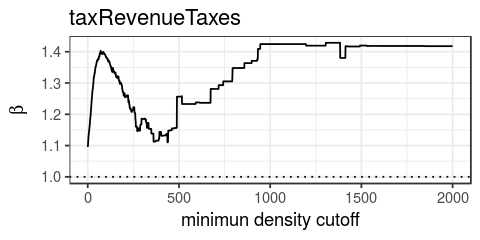

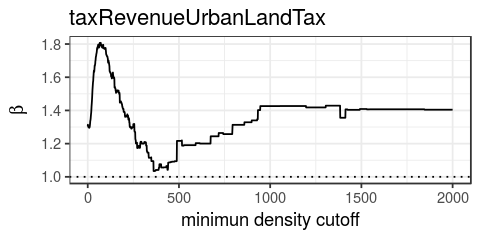

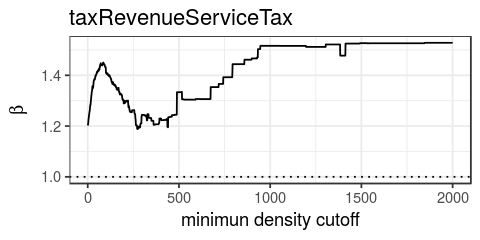

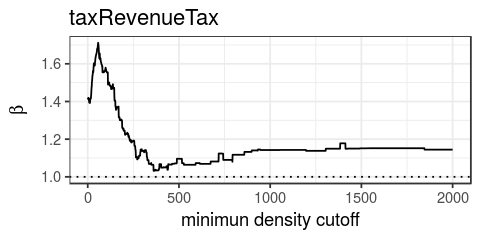

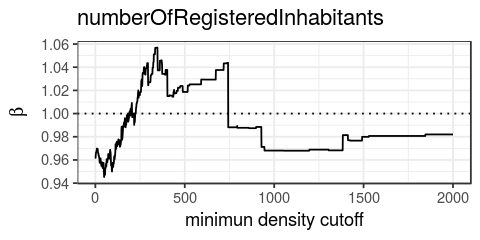

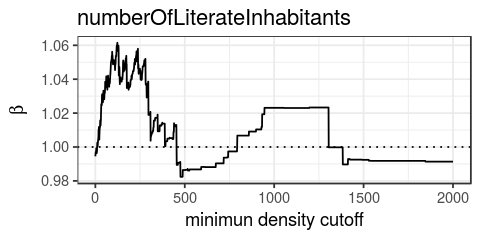

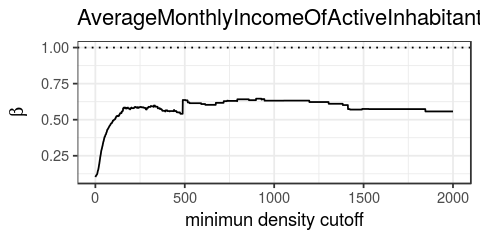

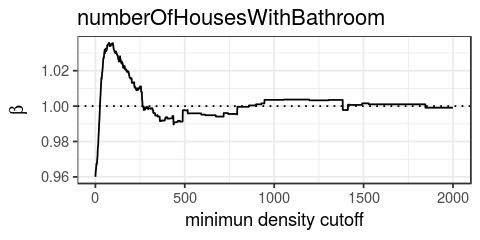

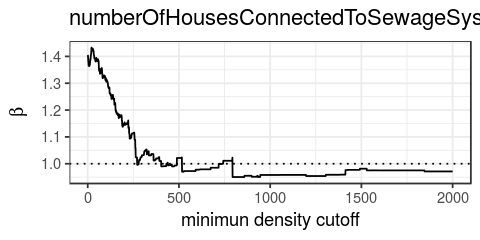

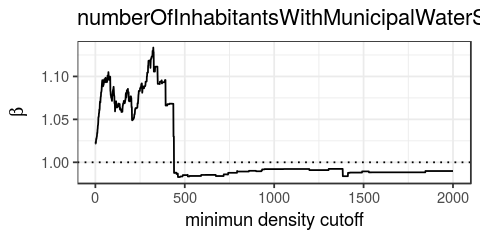

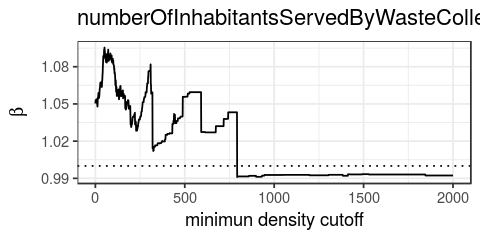

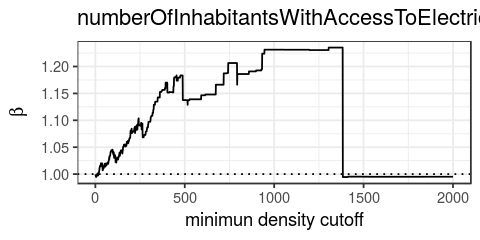

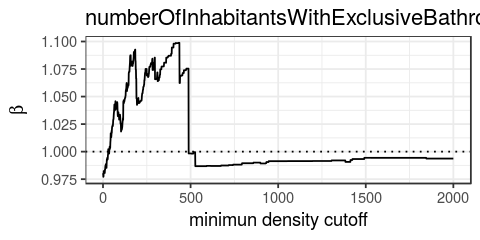

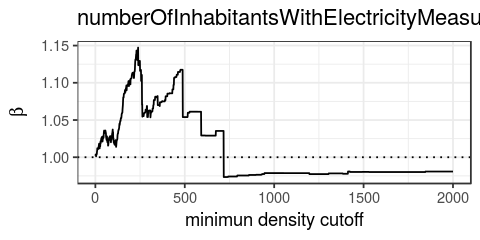

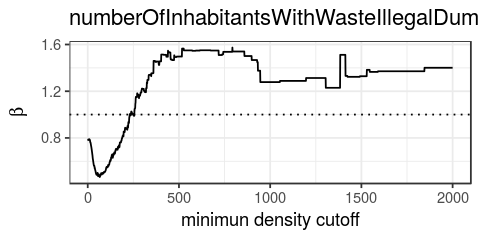

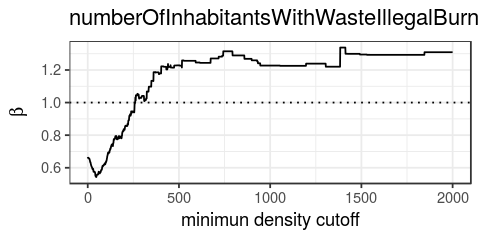

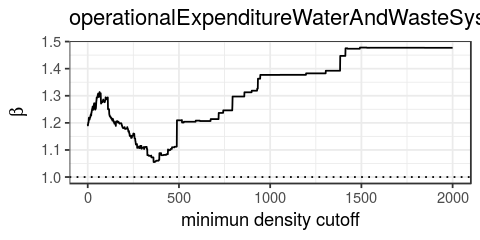

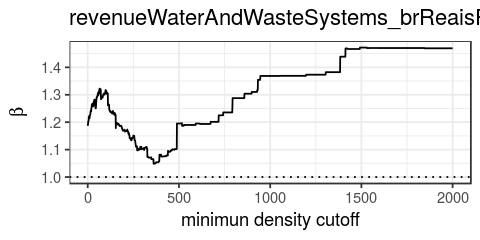

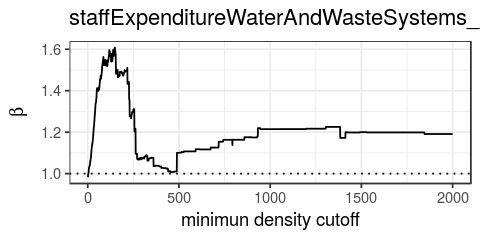

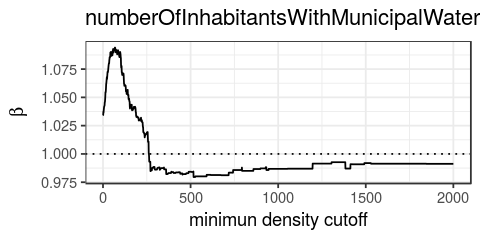

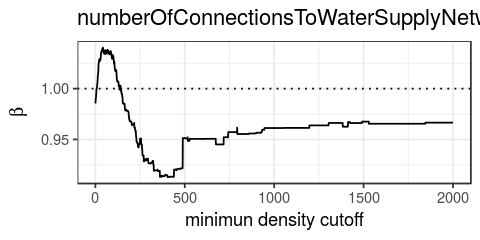

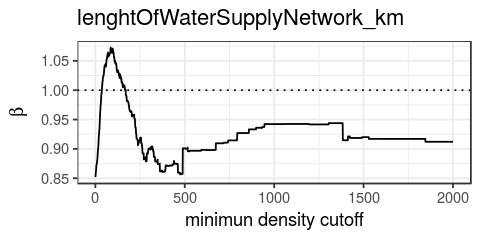

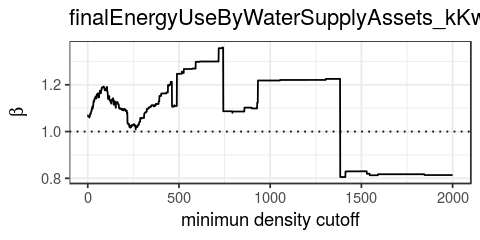

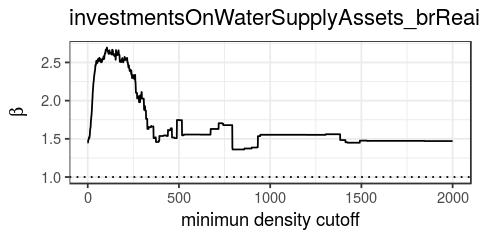

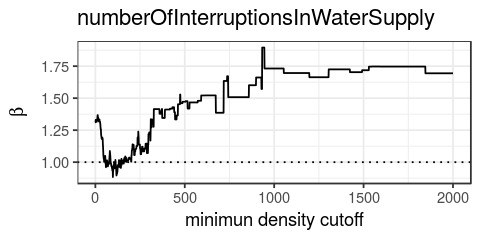

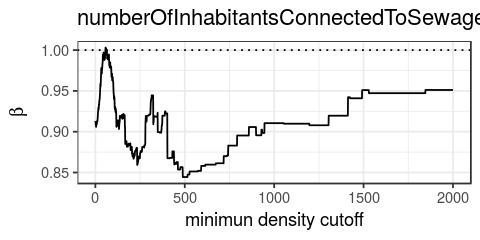

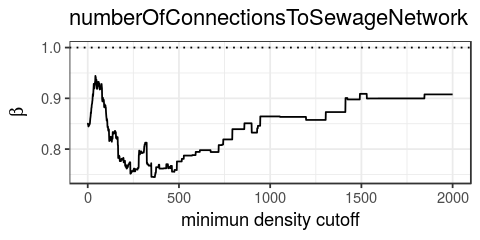

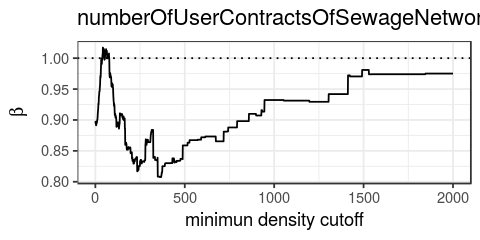

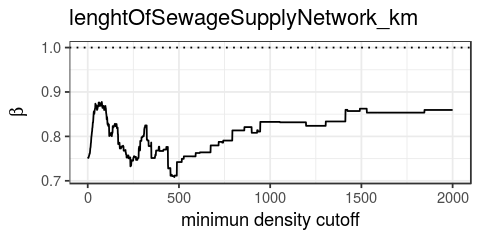

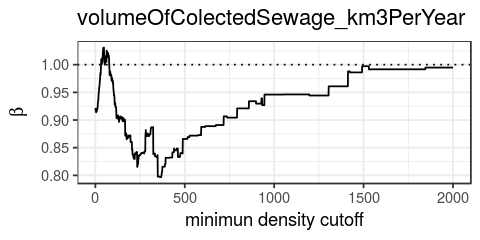

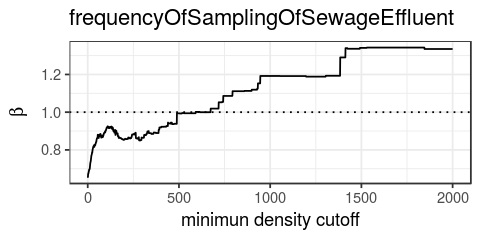

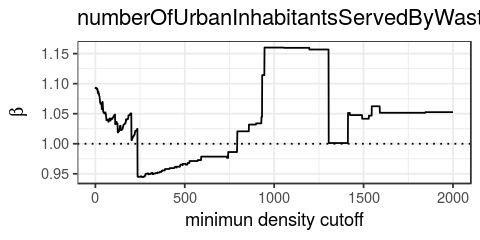

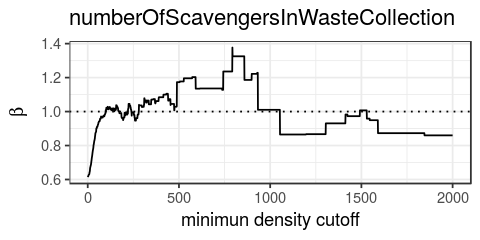

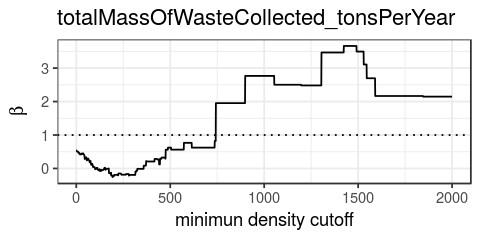

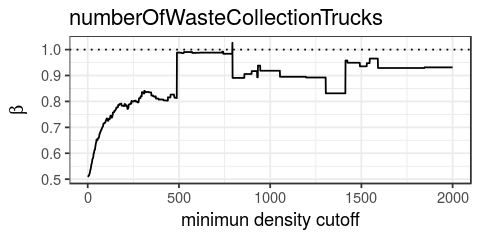

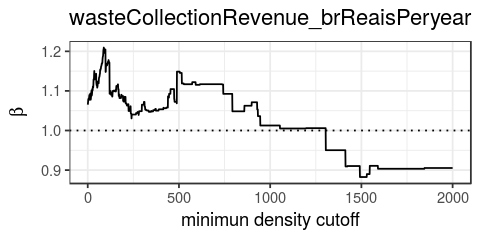

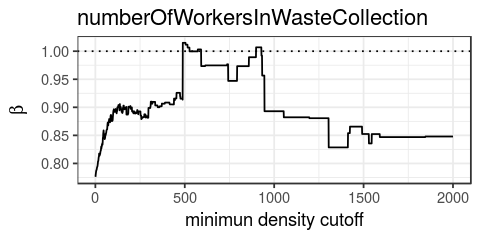

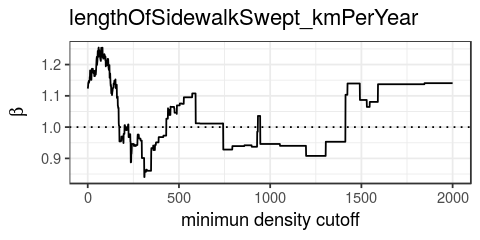

In [249]:
options(repr.plot.width=4, repr.plot.height=2)
for (v in unique(scaling_rob_class$variable)){
  
p <- ggplot(scaling_rob_class[scaling_rob_class$variable==v,], aes(dens_min, alpha))+
    geom_hline(yintercept=1, color="black", linetype="dotted") +
    #ylim(-0, 1.5) +
    ylab(expression(beta))+xlab("minimun density cutoff")+ ggtitle(v)+ 
    geom_line()+theme_bw()+ theme(legend.position="none")
    print(p)
    #ggsave(plot=p, filename=paste('./plots/', v, '.jpg', sep=""), width=4, height= 2) 
}